## 분석 결과에 필요한 자료
* 분석 결과에는 기본적인 구성과 이를 뒷받침할 자료가 있어야 한다
* IMRaD 형식을 이용하면 분석 결과를 손쉽게 표현할 수 있다  
  
  
* 제목 (Title): 주제를 포함한 짧은 주제어를 추천함.
* 초록 (Abstract): 모든 내용을 한 문단 정도로 요약한 것
* 도입 (Introduction): 문제제기, 동기, 목적, 의의 등을 정리
* 방법 (Materials & Method): 가설 설정, 데이터 정보, 분석 방법, 절차를 포함
* 결과 (Result): 분석 결과를 각종 시각화 자료로 표현. 여기서는 수치적 데이터만 제시할 것
* 논의 (Discussion): 결과 데이터를 정보로 풀어 해석. 한계점 등을 포함할 것
* 참고문헌 (References): 그 어떤 인용도 빼놓지 않고 인용 양식에 따라 작성

## 필수 분석
1. 매각 금액이 가장 많은 팀을 구하고, 하위 그룹과 유의한 차이를 보이는지 확인한다
2. 연도별 매각금액 추이를 확인한다
3. 상위 5개 지역별 매각면적을 확인한다
4. 계약 일자 정보를 토대로 매각이 많은 때의 특징을 알아본다.

## 선택 분석
1. 처분 구분별 비율을 확인한다
2. 필수-2 항목을 증감액 그래프로 표현한다
3. 필수-3 항목을 지역 크기에 따라 보정한다.

In [3]:
import pandas as pd

In [138]:
df = pd.read_csv("C:/Users/user/Downloads/한국자산관리공사_국유부동산 매각현황_20211231.csv", encoding='cp949')

In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [7]:
df1

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [8]:
df1['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [9]:
len(df1['팀명'].unique())

66

In [10]:
team_name = []

for o in df['팀명'].unique():
    m = df['팀명'] == o
    df_mask = df[m]
    
    team_name.append([o, df_mask['대장금액(원)'].sum()])

In [13]:
team_name_res = pd.DataFrame(team_name, columns = ['팀명', '대장금액(원)'])

In [14]:
team_name_res

,팀명,대장금액(원)
0,국유재산관리1팀,672337531531
1,국유울산팀,59449096732
2,국유재산관리2팀,726990294337
3,국유춘천팀,39290467064
4,국유목포팀,14225212289
...,...,...
61,평택지사,49150603287
62,의정부지사,56800825659
63,원주지사,9902403633
64,춘천지사,16990377653


In [16]:
team_name_res.sort_values('대장금액(원)', ascending=False) # True는 오름차순 False는 내림차순

,팀명,대장금액(원)
35,국유재산3팀,970904966923
34,국유재산1팀,746857030549
2,국유재산관리2팀,726990294337
0,국유재산관리1팀,672337531531
38,국유재산2팀,627778397197
...,...,...
42,원주지부,5292361984
45,춘천지부,4954916510
47,국유통영지부,2835397438
41,기획관리팀,448202500


In [18]:
import matplotlib as plt

In [21]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='팀명', ylabel='대장금액(원)'>

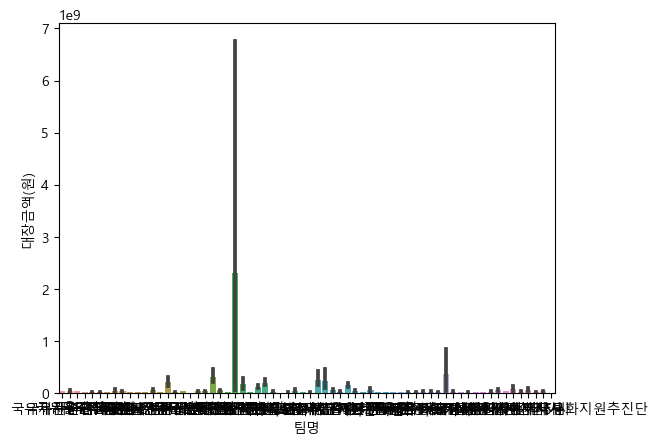

In [28]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(df['팀명'], df['대장금액(원)'])

In [29]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [31]:
import re

In [32]:
df2['계약일자'].apply(lambda x: re.findall("\d\d\d\d", str(x))[0])

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
127184    2021
127185    2021
127186    2021
127187    2021
127188    2021
Name: 계약일자, Length: 127189, dtype: object

In [33]:
df2['계약일자_연도별'] = df2['계약일자'].apply(lambda x: re.findall("\d\d\d\d", str(x))[0])

In [107]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021


In [35]:
df2['계약일자_연도별'].unique()

array(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2006',
       '2010', '2007', '2008', '2009', '2011', '2012', '2001', '2013',
       '2005', '2002', '2000', '2021'], dtype=object)

In [38]:
year_money = []

for i in df2['계약일자_연도별'].unique():
    m = df2['계약일자_연도별'] == i
    df_mask = df[m]
    
    year_money.append([i, df_mask['대장금액(원)'].sum()])

In [41]:
year_money_res = pd.DataFrame(year_money, columns = ['계약일자_연도별', '대장금액(원)'])

In [42]:
year_money_res.sort_values('계약일자_연도별', ascending=False) # True는 오름차순 False는 내림차순

,계약일자_연도별,대장금액(원)
19,2021,1106253837679
6,2020,805487274128
5,2019,982304492396
4,2018,644462913992
3,2017,739024694958
2,2016,592162886463
1,2015,1403914558254
0,2014,837309653865
15,2013,1521661430
13,2012,439117200


In [44]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'charge per year')

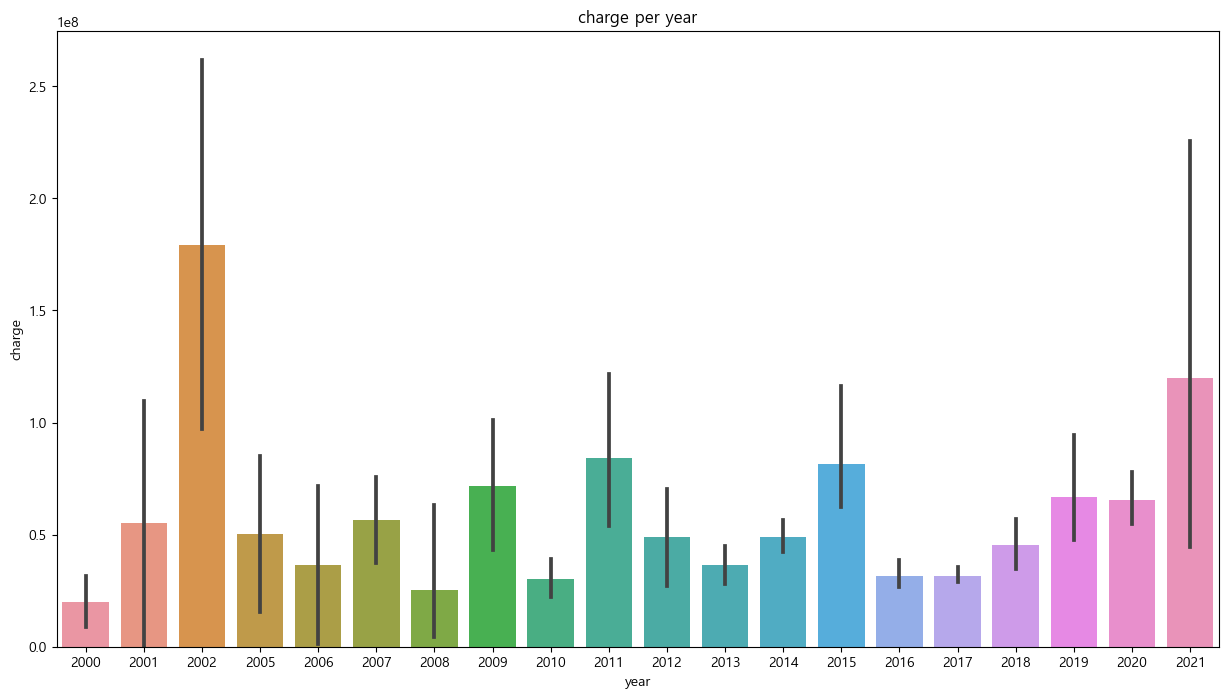

In [53]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.barplot(data = df2, x = '계약일자_연도별', y = '대장금액(원)')
plt.xlabel('year')
plt.ylabel('charge')
plt.title('charge per year')

Text(0.5, 1.0, 'charge per year')

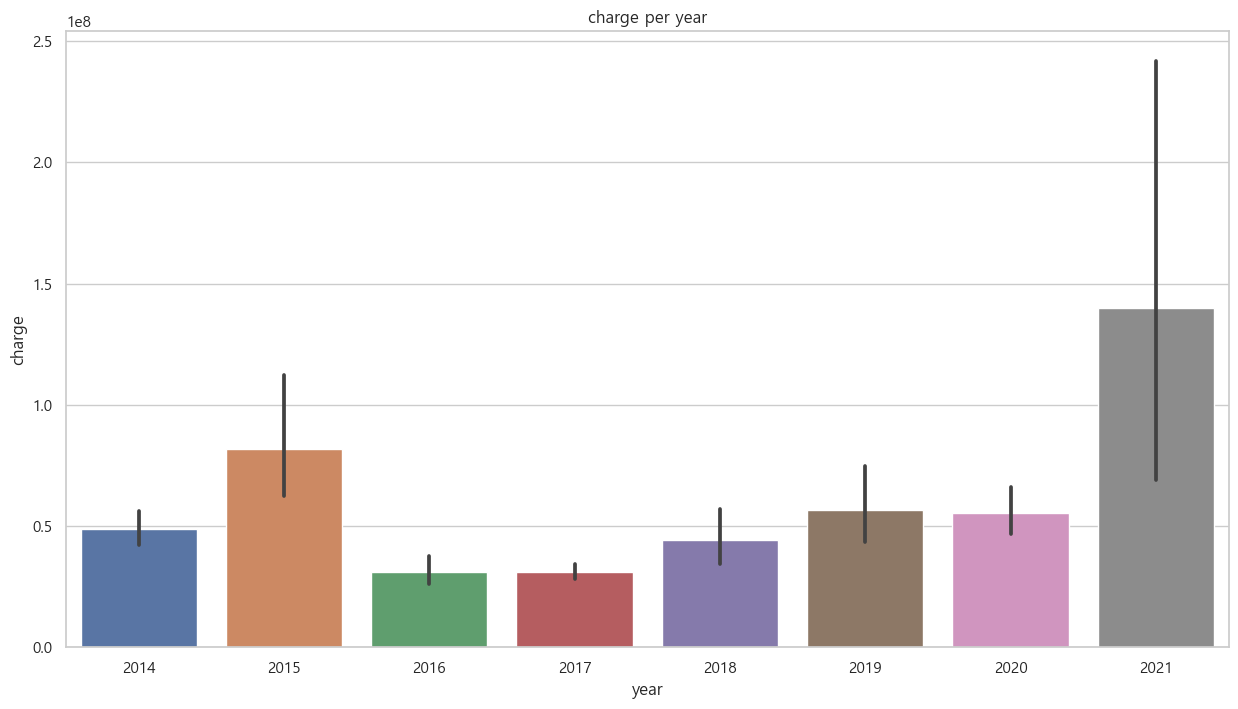

In [111]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.barplot(data = df2, x = '연도구분', y = '대장금액(원)')
plt.xlabel('year')
plt.ylabel('charge')
plt.title('charge per year')

In [49]:
df2['계약일자_연도별'] = df2['계약일자_연도별'].apply(lambda x: int(x))

In [54]:
df3

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [55]:
df3['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [61]:
area_meter = []
df_mask = []

for i in df3['지역구분'].unique():
    m = df3['지역구분'] == i
    df_mask = df[m]
    
    area_meter.append([i, df_mask['대장면적(제곱미터)'].sum()])

In [63]:
 area_meter_res = pd.DataFrame(area_meter, columns = ['지역구분', '대장면적(제곱미터)'])

In [64]:
 area_meter_res.sort_values('지역구분', ascending=False)

,지역구분,대장면적(제곱미터)
10,충청북도,5024722
7,충청남도,8023451
6,제주특별자치도,1000689
0,전라북도,6501851
5,전라남도,9090624
11,인천광역시,1636284
1,울산광역시,736384
12,세종특별자치시,274256
15,서울특별시,2948849
2,부산광역시,2767956


In [71]:
query_expr = "지역구분  == ['충청북도' or '충청남도']"

In [72]:
 area_meter_res.query(query_expr)

NotImplementedError: cannot evaluate scalar only bool ops

In [76]:
area_meter_final = area_meter_res[ (area_meter_res['지역구분'] == '충청북도') | (area_meter_res['지역구분'] == '충청남도') 
                                | (area_meter_res['지역구분'] == '제주특별자치도') | (area_meter_res['지역구분'] == '전라북도')
                                | (area_meter_res['지역구분'] == '전라남도')]

In [82]:
area_meter_final["1"] = [0, 1, 2, 3, 4]

C:\Users\user\AppData\Local\Temp\ipykernel_20304\3426563074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_meter_final["1"] = [0, 1, 2, 3, 4]


In [86]:
area_meter_final = area_meter_final.set_index("1")

In [87]:
area_meter_final

,지역구분,대장면적(제곱미터)
1,,
0,전라북도,6501851
1,전라남도,9090624
2,제주특별자치도,1000689
3,충청남도,8023451
4,충청북도,5024722


In [92]:
area_meter_final['지역크기별_보정'] = 0

for i in range(5):
    if area_meter_final['지역구분'][i] == '충청북도':
        x = area_meter_final['대장면적(제곱미터)'][i] / 7433
        area_meter_final['지역크기별_보정'][i] = x
        
    if area_meter_final['지역구분'][i] == '충청남도':
        x = area_meter_final['대장면적(제곱미터)'][i] / 8204
        area_meter_final['지역크기별_보정'][i] = x
        
    if area_meter_final['지역구분'][i] == '제주특별자치도':
        x = area_meter_final['대장면적(제곱미터)'][i] / 1849
        area_meter_final['지역크기별_보정'][i] = x 
        
    if area_meter_final['지역구분'][i] == '전라북도':
        x = area_meter_final['대장면적(제곱미터)'][i] / 8067
        area_meter_final['지역크기별_보정'][i] = x 
        
    if area_meter_final['지역구분'][i] == '전라남도':
        x = area_meter_final['대장면적(제곱미터)'][i] / 12247
        area_meter_final['지역크기별_보정'][i] = x 

C:\Users\user\AppData\Local\Temp\ipykernel_20304\2512601244.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_meter_final['지역크기별_보정'][i] = x


In [93]:
area_meter_final

,지역구분,대장면적(제곱미터),지역크기별_보정
1,,,
0,전라북도,6501851,805.981282
1,전라남도,9090624,742.273536
2,제주특별자치도,1000689,541.205516
3,충청남도,8023451,977.992565
4,충청북도,5024722,676.001883


In [ ]:
stats.ks_2samp(new_df6['판매금액'], new_df7['판매금액'])

In [98]:
from scipy import stats

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([541.2055165 , 676.00188349, 742.27353638, 805.98128177,
         977.9925646 ])),
 (184.13060642679125, 748.6909565464082, 0.9912668180056048))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


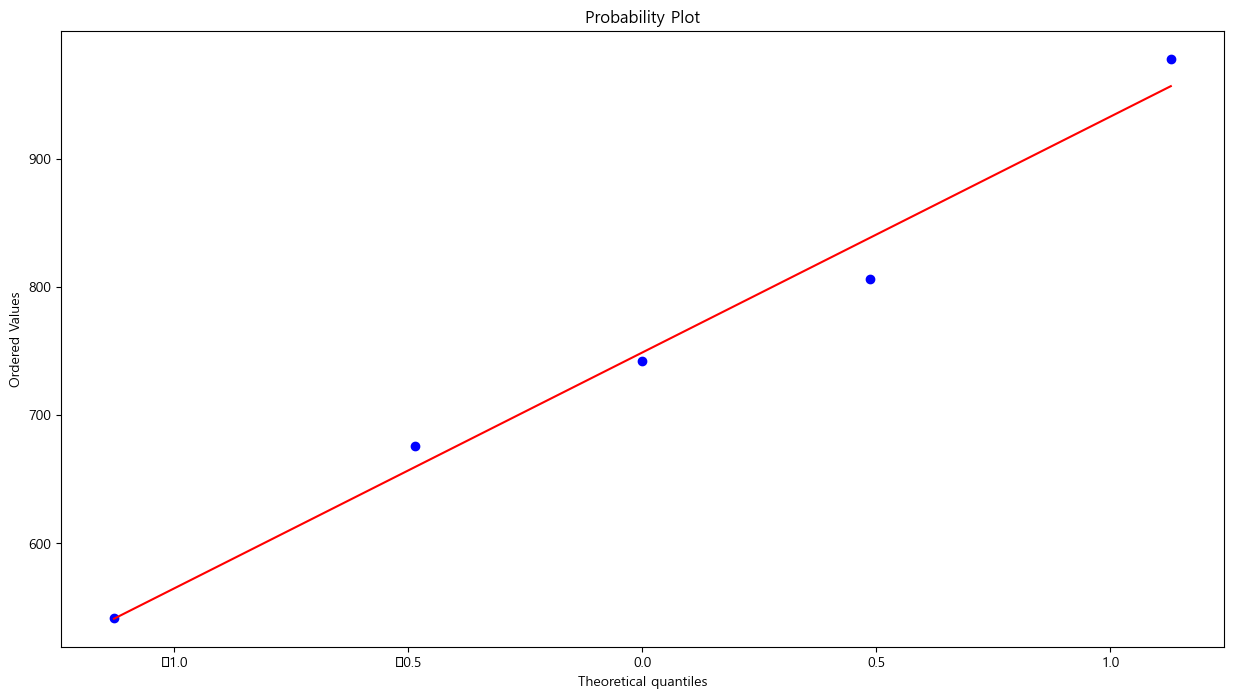

In [100]:
stats.probplot(area_meter_final['지역크기별_보정'], plot=plt)

In [101]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021


<AxesSubplot: >

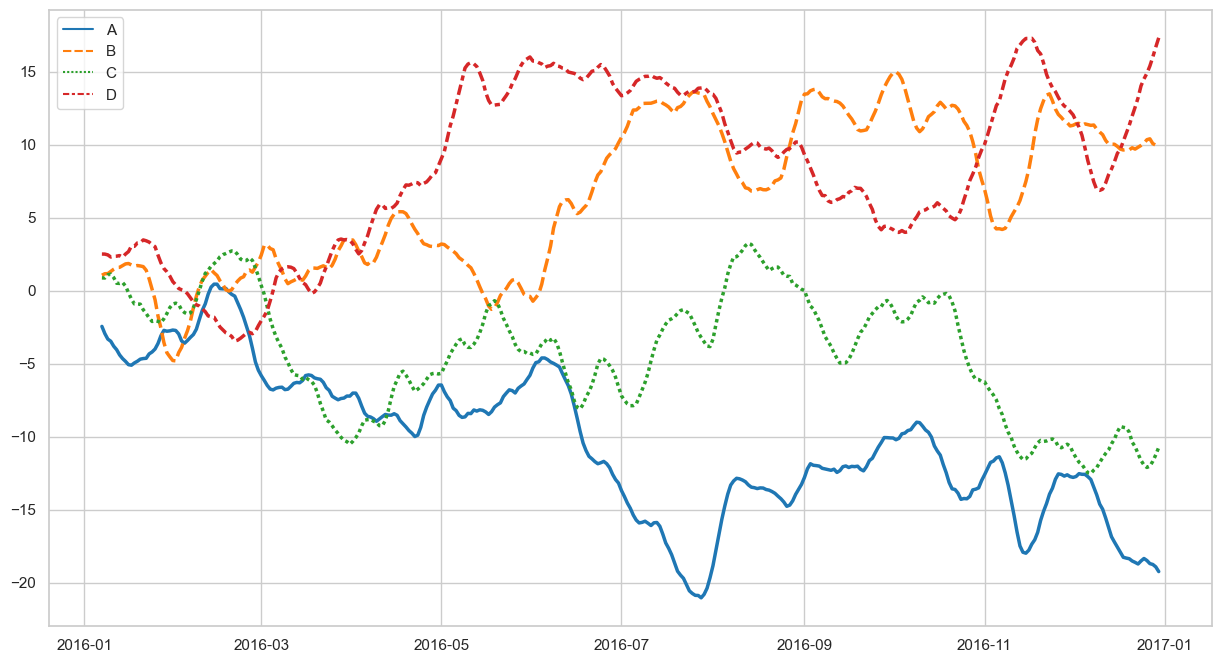

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [103]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990


<AxesSubplot: xlabel='계약일자_연도별', ylabel='대장금액(원)'>

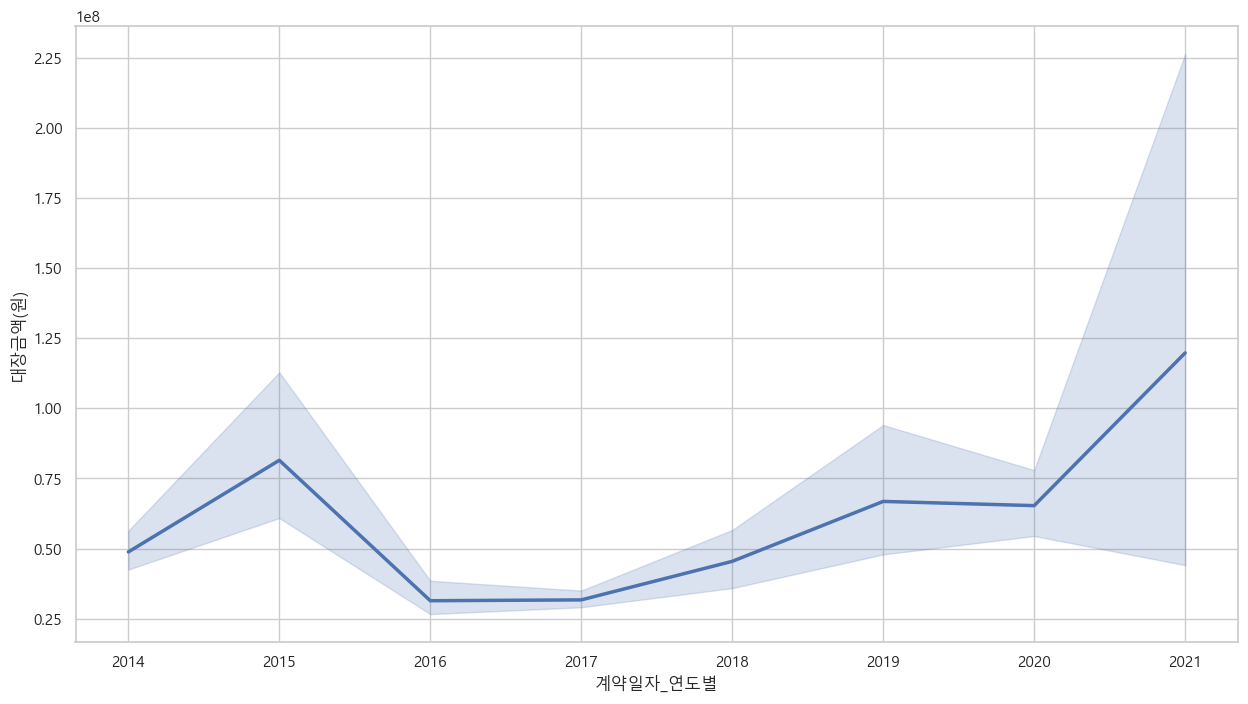

In [120]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.lineplot(data=df2, palette="tab10", linewidth=2.5, x="계약일자_연도별", y="대장금액(원)")

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.lineplot(data=df2, palette="tab10", linewidth=2.5, x="계약일자_연도별", y="대장금액(원)")

In [119]:
df2 = df2[df2['계약일자_연도별'] >= 2014]

In [106]:
sns.lollipopplot(df['팀명'], df['대장금액(원)'])

AttributeError: module 'seaborn' has no attribute 'lollipopplot'

In [109]:
df2['계약일자_연도별'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2006, 2010, 2007, 2008,
       2009, 2011, 2012, 2001, 2013, 2005, 2002, 2000, 2021], dtype=int64)

In [110]:
df2[df2['계약일자_연도별'] < 2014]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
103144,2020,서울특별시,서울특별시 구로구 고척동 287-76,토지,대,22,48057900,처분(매각수의),2006-02-27,서울서부지역본부,국유재산3팀,2006
103204,2020,서울특별시,서울특별시 서대문구 북아현동 1-1015,토지,대,16,13510800,처분(매각수의),2010-10-20,서울서부지역본부,국유재산2팀,2010
103205,2020,서울특별시,서울특별시 서대문구 북아현동 1-1116,토지,대,58,81200000,처분(매각수의),2010-11-30,서울서부지역본부,국유재산2팀,2010
103206,2020,서울특별시,서울특별시 서대문구 북아현동 1-1466,토지,대,5,3580800,처분(매각수의),2010-10-20,서울서부지역본부,국유재산2팀,2010
103230,2020,서울특별시,서울특별시 서대문구 북아현동 1-1566,토지,대,89,130841571,처분(매각수의),2010-10-20,서울서부지역본부,국유재산2팀,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
118885,2021,서울특별시,서울특별시 동작구 흑석동 산 79-45,토지,임야,94,131191289,처분(매각수의),2009-02-23,서울서부지역본부,국유재산2팀,2009
118912,2021,서울특별시,서울특별시 동작구 흑석동 산 79-21,토지,임야,75,87000810,처분(매각수의),2009-02-23,서울서부지역본부,국유재산2팀,2009
118913,2021,서울특별시,서울특별시 동작구 흑석동 산 79-45,토지,임야,38,52479313,처분(매각수의),2009-02-23,서울서부지역본부,국유재산2팀,2009
118914,2021,서울특별시,서울특별시 동작구 흑석동 산 79-20,토지,임야,2,5640000,처분(매각수의),2009-02-23,서울서부지역본부,국유재산2팀,2009


In [ ]:
1. 연도구분
2. 다른 데이터 가져오기
3. 

In [112]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021


In [114]:
df2[df2["계약일자_연도별"] == 2002]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
106741,2020,서울특별시,서울특별시 중구 신당동 133-38,토지,대,126,261664000,처분(매각수의),2002-05-16,서울서부지역본부,국유재산3팀,2002
106742,2020,서울특별시,서울특별시 중구 신당동 133-10,토지,대,29,96903000,처분(매각수의),2002-05-16,서울서부지역본부,국유재산3팀,2002


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.barplot(data = df2, x = '계약일자_연도별', y = '대장금액(원)')
plt.xlabel('year')
plt.ylabel('charge')
plt.title('charge per year')

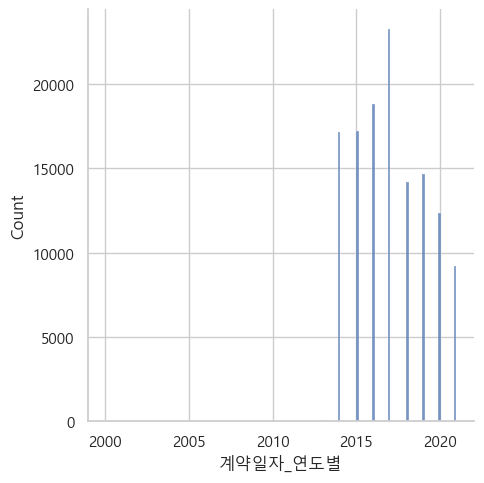

In [115]:
sns.displot(df2['계약일자_연도별'])
plt.show()

In [ ]:
127189

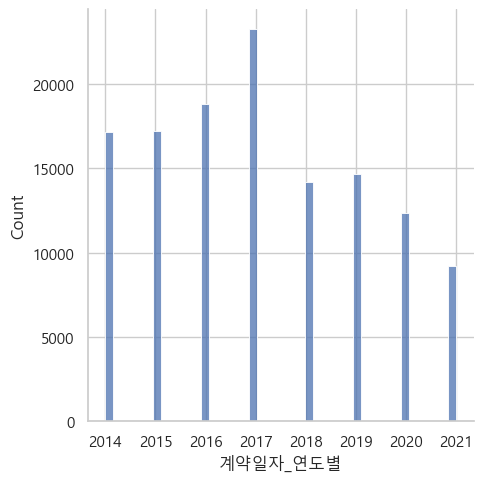

In [121]:
sns.displot(df2['계약일자_연도별'])
plt.show()

In [122]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021


In [126]:
df2['계약일자_월별'] = df2['계약일자'].apply(lambda x: x.split('-')[1])

C:\Users\user\AppData\Local\Temp\ipykernel_20304\213222855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['계약일자_월별'] = df2['계약일자'].apply(lambda x: x.split('-')[1])


In [127]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별,계약일자_월별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,01
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014,01
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,01
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,01
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021,12
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021,12
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021,12
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021,12


In [129]:
df2['계약일자_월별'] = df2['계약일자_월별'].apply(lambda x: int(x))

C:\Users\user\AppData\Local\Temp\ipykernel_20304\1405969104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['계약일자_월별'] = df2['계약일자_월별'].apply(lambda x: int(x))


Text(0.5, 1.0, 'charge per month')

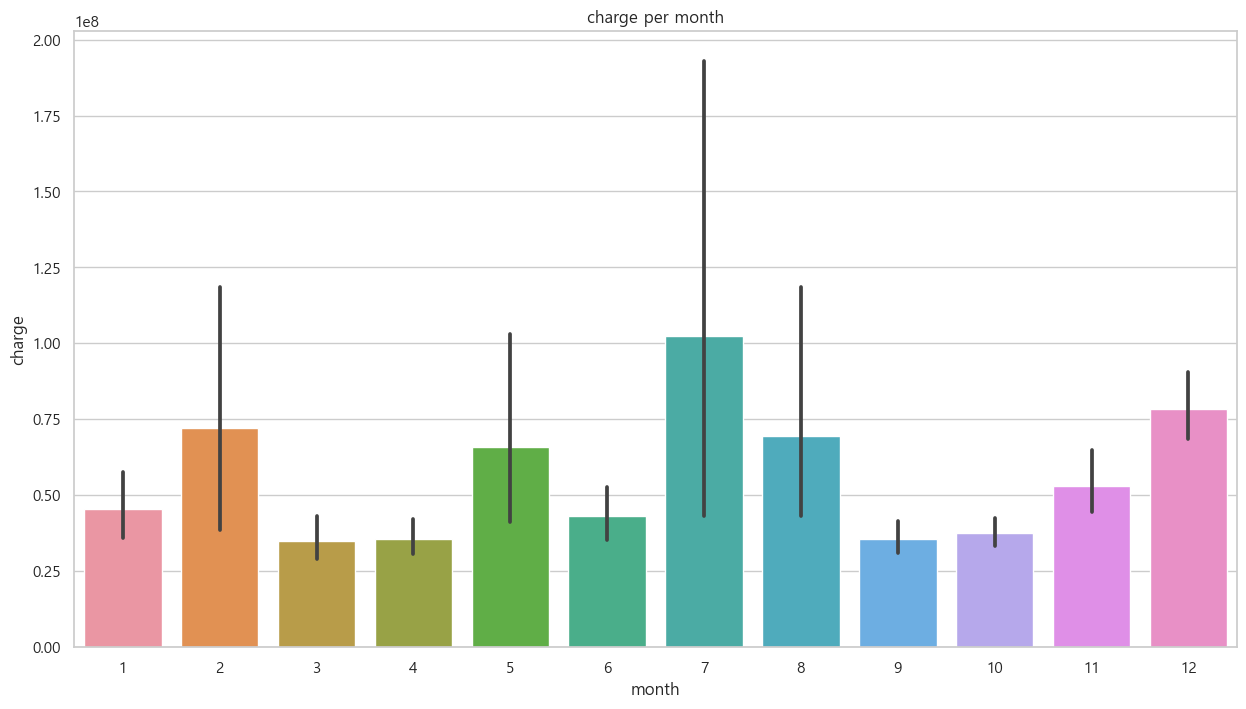

In [130]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.barplot(data = df2, x = '계약일자_월별', y = '대장금액(원)')
plt.xlabel('month')
plt.ylabel('charge')
plt.title('charge per month')

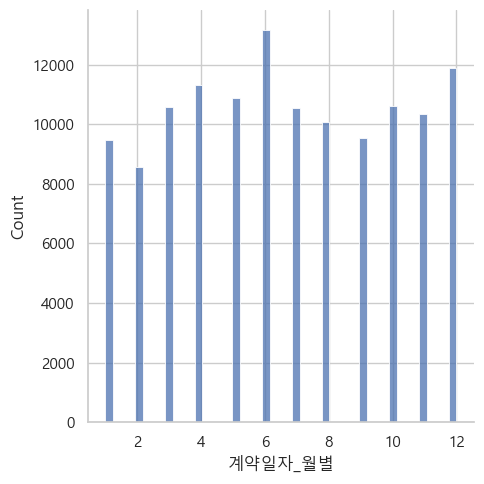

In [131]:
sns.displot(df2['계약일자_월별'])
plt.show()

In [134]:
df2_6 = df2[df2['계약일자_월별'] == 6]

In [142]:
df2_6['공부지목'].unique()

array(['답', '임야', '잡종지', '전', '대', '제방', '구거', '종교용지', '주차장', '도로',
       '공장용지', '목장용지', '학교용지', '확인불가', '과수원', '공원', '하천', '철도용지', '묘지',
       '창고용지', '양어장', '유지', '체육용지', '수도용지', '유원지', '사적지', '주유소용지'],
      dtype=object)

In [137]:
df2_6

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별,계약일자_월별
6788,2014,경기도,경기도 평택시 현덕면 장수리 407-30,토지,답,125,27750000,처분(매각수의),2014-06-02,경기지역본부,국유평택팀,2014,6
6789,2014,강원도,강원도 삼척시 갈천동 산 45-4,토지,임야,1394,13786660,처분(매각수의),2014-06-02,강원지역본부,국유팀,2014,6
6790,2014,경기도,경기도 의정부시 신곡동 167-21,토지,잡종지,27,20790000,처분(매각수의),2014-06-02,서울국유재산부,의정부팀,2014,6
6791,2014,경상남도,경상남도 창녕군 남지읍 신전리 120-2,토지,전,1266,15090720,처분(매각수의),2014-06-02,경남지역본부,국유재산관리1팀,2014,6
6792,2014,경기도,경기도 동두천시 상패동 630-1,토지,전,50,10150000,처분(매각수의),2014-06-02,서울국유재산부,의정부팀,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126071,2021,경상북도,경상북도 경산시 압량읍 부적리 88-5,토지,대,131,35063460,처분(매각수의),2021-06-30,대구경북지역본부,국유재산관리3팀,2021,6
126072,2021,경상북도,경상북도 경산시 압량읍 부적리 65-15,토지,도로,1086,48555060,처분(매각수의),2021-06-30,대구경북지역본부,국유재산관리3팀,2021,6
126074,2021,경상북도,경상북도 안동시 정하동 668-2,토지,구거,16,1557389,처분(매각수의),2021-06-24,대구경북지역본부,안동지사,2021,6
126119,2021,부산광역시,부산광역시 사하구 괴정동 255-69,토지,임야,14,7392000,처분(매각수의),2021-06-30,부산지역본부,국유재산관리2팀,2021,6


In [139]:
df5 = df.copy()

In [140]:
df5['재산구분'].unique()

array(['토지', '건물'], dtype=object)

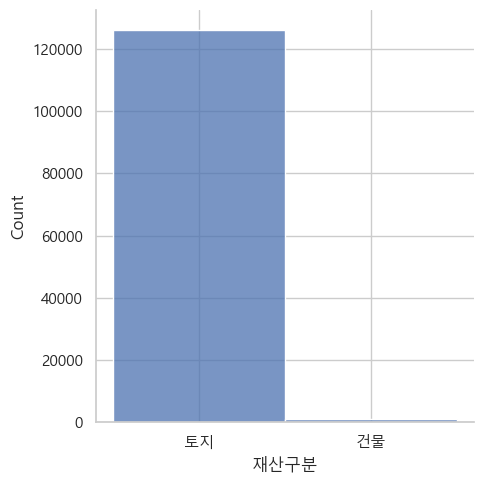

In [141]:
sns.displot(df5['재산구분'])
plt.show()

In [ ]:
토지가 훨씬 많음

In [143]:
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자_연도별,계약일자_월별
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,1
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,2014,1
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,1
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,2014,1
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021,12
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,2021,12
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,2021,12
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,2021,12


In [145]:
from statannot import add_stat_annotation

TypeError: 'NoneType' object is not iterable

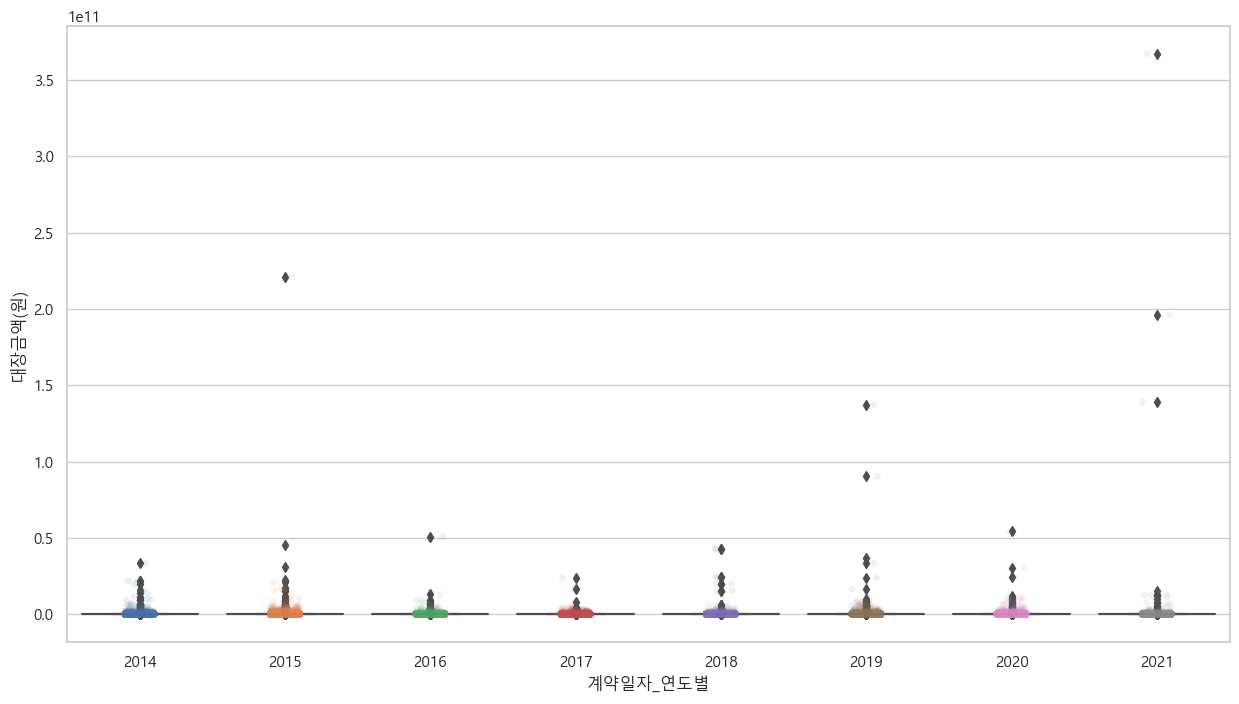

In [150]:
ax1 = plt.subplot()
sns.boxplot(data=df2, x='계약일자_연도별', y='대장금액(원)', color='0.5', ax = ax1)
sns.stripplot(data = df2, x = '계약일자_연도별', y = '대장금액(원)', alpha = 0.1, ax = ax1)

add_stat_annotation(ax1,
                   data = df2,
                   x = '계약일자_연도별',
                   y = '대장금액(원)',
                   test = 't-test_ind',
                    text_format='simple',
                   loc = 'inside')

In [ ]:
area_meter_final

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2014 v.s. 2015: Welch's t-test independent samples with Bonferroni correction, P_val=5.706e-01 stat=-2.306e+00
2015 v.s. 2016: Welch's t-test independent samples with Bonferroni correction, P_val=9.606e-03 stat=3.572e+00
2016 v.s. 2017: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.758e-02
2017 v.s. 2018: Welch's t-test independent samples with Bonferroni correction, P_val=5.199e-01 stat=-2.341e+00
2018 v.s. 2019: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.605e+00
2019 v.s. 2020: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.107e-01
2020 v.s. 2021: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.134e+00
2014 v.s. 2016: Welch's t-test independent samples with Bonfe

(<AxesSubplot: xlabel='계약일자_연도별', ylabel='대장금액(원)'>,
  <statannot.StatResult.StatResult at 0x27c69b30cd0>])

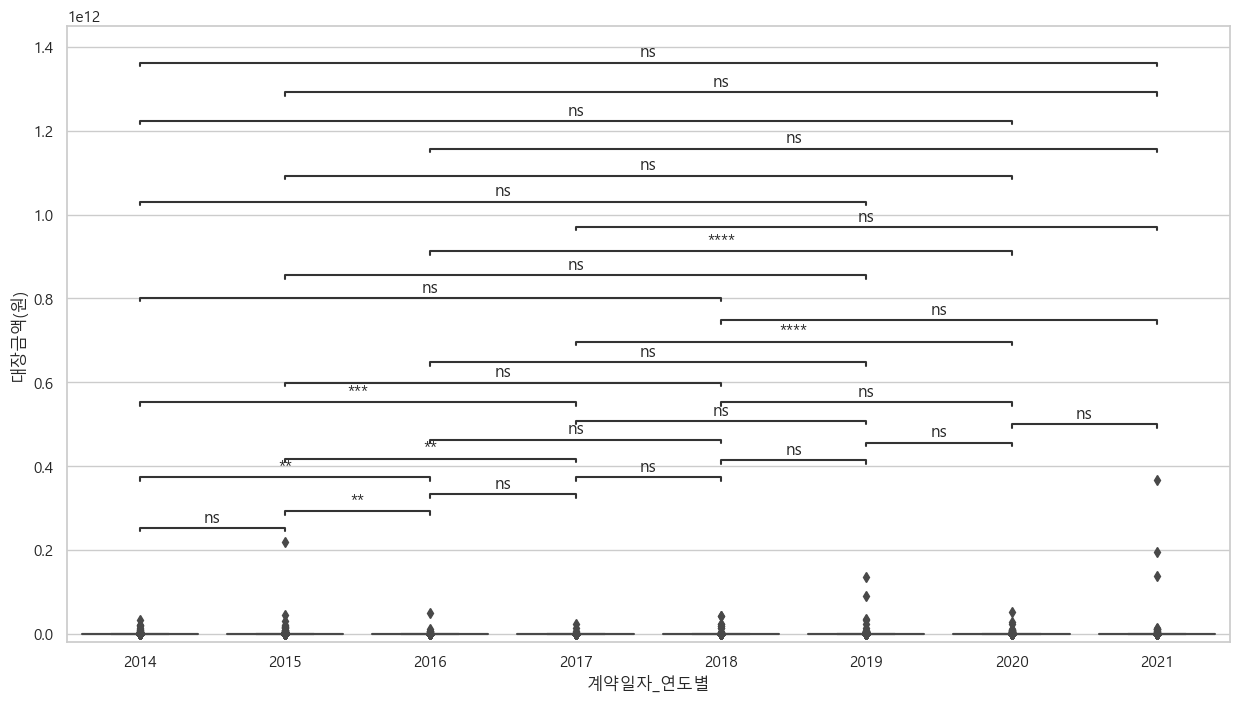

In [156]:
ax = plt.subplot()
ax = sns.boxplot(data=df2, x = '계약일자_연도별', y='대장금액(원)')

add_stat_annotation(ax, data=df2,
                    x = '계약일자_연도별',
                    y='대장금액(원)', 
                    box_pairs=[((2014), (2015)),
                               ((2014), (2016)),
                               ((2014), (2017)),
                               ((2014), (2018)),
                               ((2014), (2019)),
                               ((2014), (2020)),
                               ((2014), (2021)),
                               ((2015), (2016)),
                               ((2015), (2017)),
                               ((2015), (2018)),
                               ((2015), (2019)),
                               ((2015), (2020)),
                               ((2015), (2021)),
                               ((2016), (2017)),
                               ((2016), (2018)),
                               ((2016), (2019)),
                               ((2016), (2020)),
                               ((2016), (2021)),
                               ((2017), (2018)),
                               ((2017), (2019)),
                               ((2017), (2020)),
                               ((2017), (2021)),
                               ((2018), (2019)),
                               ((2018), (2020)),
                               ((2018), (2021)),
                               ((2019), (2020)),
                               ((2020), (2021)),
                              ],
                   test='t-test_welch',
                    text_format='star',
                    loc='inside',
                    verbose=2)

In [ ]:
ax = plt.subplot()
sns.boxplot(data=df, x='결제방법정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

add_stat_annotation(ax,
                   data = df,
                   x = '결제방법정리',
                   y = '판매금액_로그',
                   box_pairs = [(('Card'), ('Virtual Account')),
                               (('Card'), ('After Payment')),
                               (('Card'), ('Account')),
                               (('Card'), ('Etc.'))],
                   test = 't-test_ind',
                   text_format = 'star',
                   loc = 'inside',
                   verbose = 2)

2014 v.s. 2021: t-test independent samples with Bonferroni correction, P_val=2.047e-06 stat=4.750e+00


C:\ProgramData\Anaconda3\lib\site-packages\statannot\statannot.py:593: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\user\AppData\Local\Temp\ipykernel_20304\237153852.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./ttest_res.png', bbox_inches='tight', dpi=300)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


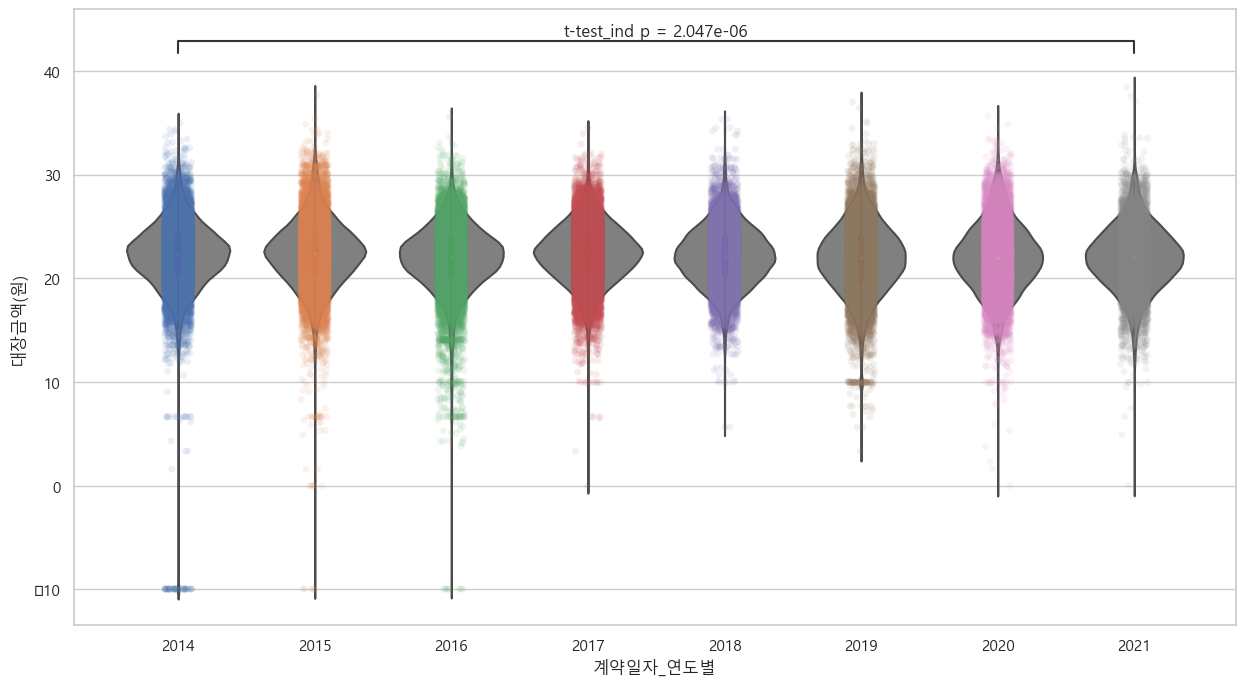

In [161]:
ax1 = plt.subplot()

sns.violinplot(x=df2['계약일자_연도별'], y=np.log2(df2['대장금액(원)']+0.001), color='0.5', ax=ax1)
sns.stripplot(x=df2['계약일자_연도별'], y=np.log2(df2['대장금액(원)']+0.001), alpha=0.1, ax=ax1)

add_stat_annotation(ax1, x=df2['계약일자_연도별'], y=np.log2(df2['대장금액(원)']+0.001),
                    test='t-test_ind', text_format='full',
                   box_pairs=[(2014, 2021)])

plt.savefig('./ttest_res.png', bbox_inches='tight', dpi=300)

In [163]:
df2['처분구분명'].unique()

array(['처분(매각수의)', '처분(무상관리전환)', '처분(매각입찰)', '처분(유상관리전환)', '처분(무상양여)',
       '처분(유상양여)', '처분(사용승인)', '처분(무상귀속)'], dtype=object)